## Midterm 2 - MNIST Classification
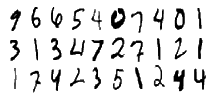
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/r52T6newOqn1Wcw03
#### Commit your code to github/bitbucket into folder midterm


In [1]:
from mnist import MNIST
import random
mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 60000
The label of random image 9 The random image is 
............................
............................
............................
............................
............................
............................
..............@@@...........
............@@@@@@..........
...........@................
..........@.................
..........@......@..........
..........@@....@...........
...........@@@@@@...........
...............@@...........
...............@............
...............@............
..............@@............
..............@.............
..............@.............
..............@.............
..............@.............
.............@@.............
.............@@.............
.............@@.............
.............@@.............
.............@..............
............................
............................
Images are binary with 28*28 =  784


In [8]:
from mnist import MNIST
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score as sc
import numpy as np

mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()

index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(teimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

X = np.array(trimages)
Y = to_categorical(trlabels)
X_tests =  np.array(teimages)
Y_tests = to_categorical(telabels)

model = Sequential()
model.add(Dense(150, input_dim = len(trimages[index]), activation = 'relu', init = 'uniform'))
model.add(Dense(120, init = 'uniform', activation = 'relu'))
model.add(Dense(90, init = 'uniform', activation = 'relu'))
model.add(Dense(60, init = 'uniform', activation = 'relu'))

model.add(Dense(Y.shape[1], init = 'uniform', activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, 
          Y, 
          epochs=40, 
          batch_size=100, 
          verbose=1)

results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

print("Accuracy:")
sc(model.predict_classes(np.array(teimages)), np.array(telabels))

The amount of train images 60000
The amount of test images 60000
The label of random image 9 The random image is 
............................
............................
............................
............................
............................
............................
............................
.................@@@........
..............@@@@@@@.......
..........@@@@......@@......
........@@@@.......@@@......
.......@@@........@@@.......
.......@.........@@@@.......
......@........@@@@@........
......@.....@@@@@@@.........
.......@@@@@....@@@.........
.................@@.........
................@@..........
................@@..........
...............@@...........
...............@@...........
...............@............
..............@@............
..............@@............
.............@@.............
.............@@.............
............@@..............
............................
Images are binary with 28*28 =  784


C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, input_dim=784, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(120, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(60, activation="relu", kernel_initializer="uniform")`
C:\Users\MakpalPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="uniform")`


Epoch 1/40
60000/60000 [==============================] - 6s 94us/step - loss: 0.2559 - acc: 0.9217
Epoch 2/40
60000/60000 [==============================] - 5s 84us/step - loss: 0.1116 - acc: 0.9666
Epoch 3/40
60000/60000 [==============================] - 5s 85us/step - loss: 0.0809 - acc: 0.9755: 1
Epoch 4/40
60000/60000 [==============================] - 5s 83us/step - loss: 0.0666 - acc: 0.9795
Epoch 5/40
60000/60000 [==============================] - 5s 89us/step - loss: 0.0566 - acc: 0.9829
Epoch 6/40
60000/60000 [==============================] - 5s 86us/step - loss: 0.0510 - acc: 0.9846
Epoch 7/40
60000/60000 [==============================] - 5s 86us/step - loss: 0.0398 - acc: 0.9879
Epoch 8/40
60000/60000 [==============================] - 5s 86us/step - loss: 0.0394 - acc: 0.9880
Epoch 9/40
60000/60000 [==============================] - 6s 98us/step - loss: 0.0343 - acc: 0.9899
Epoch 10/40
60000/60000 [==============================] - 5s 89us/step - loss: 0.0314 - acc: 0.9

0.98050000000000004

In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy: 0.9204
